Pandas
------------------------

* Provides easy to use data structures & a ton of useful helper functions for data cleanup and transformations
* Fast!
* In python, not R :)
* integrates well with scikit-learn and other libraries
* We'll look at Montreal biking data from [http://donnees.ville.montreal.qc.ca/](http://donnees.ville.montreal.qc.ca/)

IPython Notebook
----------------
* web-based user interface to IPython
* pretty graphs
* Can make slideshows :) (this presentation)

## Import the 2012 bike path data from a CSV

#### Download and unzip the zip file from  <a href="http://donnees.ville.montreal.qc.ca/fiche/velos-comptage/">this page</a> to run this yourself. The 2011 and earlier csvs have dates that are a little harder to parse, but I'll leave that as an exercise :)

In [1]:
import pandas as pd

In [27]:
# some display options to make figures bigger
pd.set_option('display.max_columns', 50)
from pylab import *
rcParams['figure.figsize'] = (17, 7)

In [4]:
bike_data = pd.read_csv("./2012.csv", encoding='latin1', sep=',', index_col='Date', parse_dates=True, dayfirst=True)

In [5]:
bike_data = bike_data.dropna(axis=1)

In [9]:
bike_data = bike_data.drop("Unnamed: 1", axis=1)

In [10]:
bike_data.head()

,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Parc,PierDup,CSC (CÃ´te Sainte-Catherine)
Date,,,,,,,
2012-01-01,16,35,51,38,26,10,0
2012-01-02,43,83,153,68,53,6,1
2012-01-03,58,135,248,104,89,3,2
2012-01-04,61,144,318,116,111,8,1
2012-01-05,95,197,330,124,97,13,2


<h3> This is a <i>dataframe</i> </h3>

* Think of it like a database table (rows, columns, etc.)
* has an index column

<Axes: xlabel='Date'>

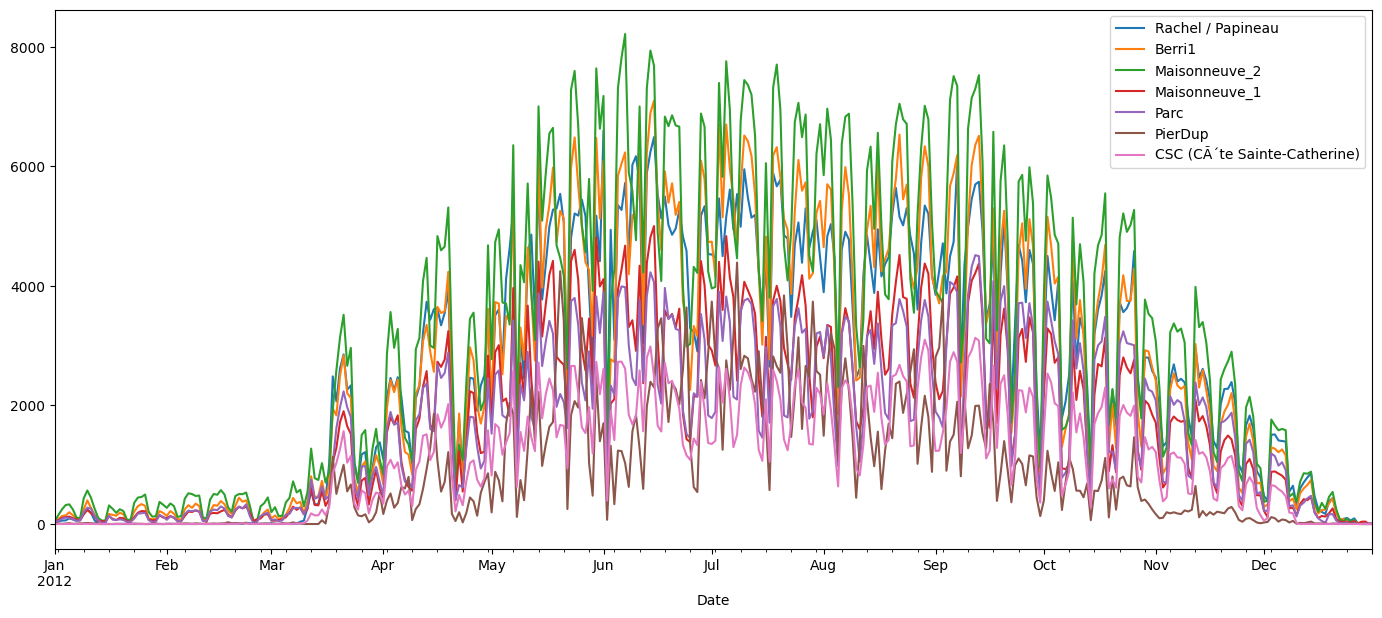

In [13]:
bike_data.plot()

In [14]:
bike_data.describe()

,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Parc,PierDup,CSC (CÃ´te Sainte-Catherine)
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2605.653005,2678.234973,3172.120219,1783.762295,1698.114754,907.019126,1109.306011
std,2010.385246,2149.301945,2463.726403,1435.398169,1318.520253,1039.620662,933.862044
min,0.000000,4.000000,1.000000,4.000000,0.000000,0.000000,0.000000
25%,441.500000,433.500000,604.000000,292.250000,309.500000,18.500000,26.500000
50%,2458.500000,2326.000000,3044.000000,1702.000000,1709.500000,509.500000,1085.500000
75%,4496.000000,4642.750000,5050.000000,2993.000000,2895.500000,1517.500000,1868.000000
max,6595.000000,7104.000000,8220.000000,4999.000000,4510.000000,4386.000000,3124.000000


<Axes: xlabel='Date'>

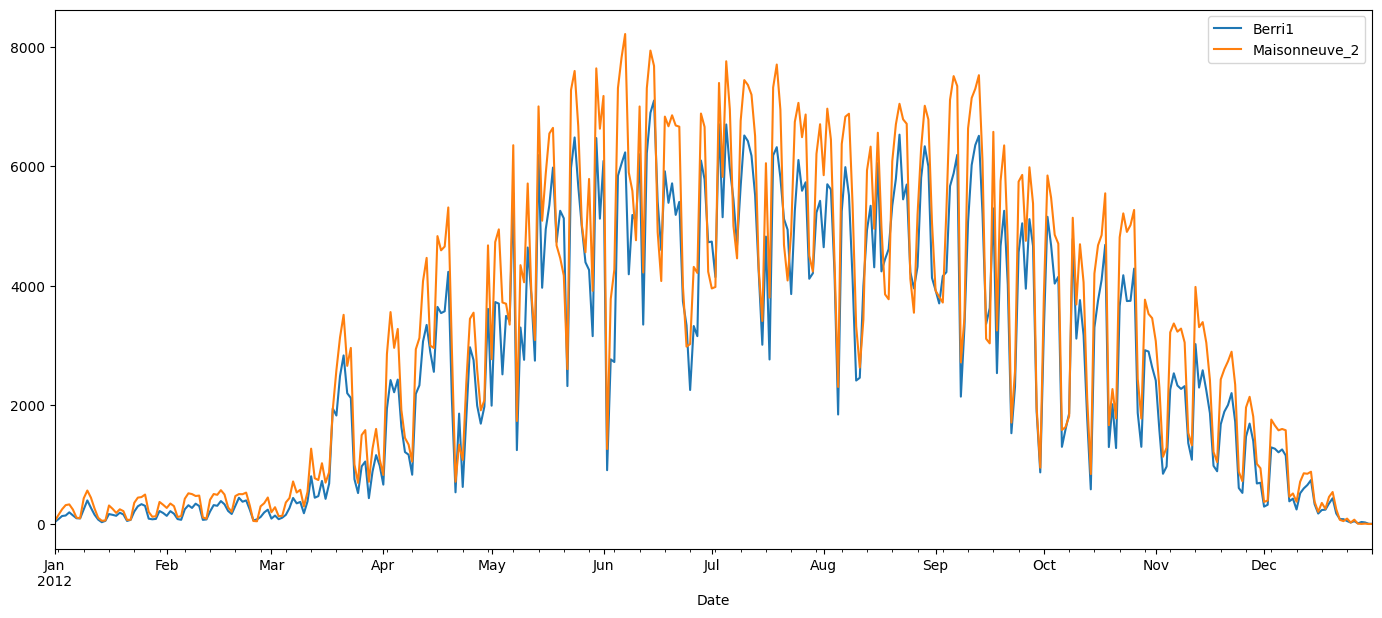

In [17]:
bike_data[['Berri1', 'Maisonneuve_2']].plot()

## Let's compare with some weather data!

In [20]:
def get_weather_data(year):
    url_template = "http://climate.weatheroffice.gc.ca/climateData/bulkdata_e.html?Prov=QC&StationID=5415&Year={year}&Month={month}&Day=14&timeframe=1&format=csv"
    data_by_month = []
    for month in range(1, 13):
        url = url_template.format(year=year, month=month)
        weather_data = pd.read_csv(url, skiprows=16, index_col='Date/Time', parse_dates=True).dropna(axis=1)
        weather_data.columns = map(lambda x: x.replace('\xb0', ''), weather_data.columns)
        weather_data = weather_data.drop(['Year', 'Day', 'Month', 'Time', 'Data Quality'], axis=1)
        data_by_month.append(weather_data.dropna())
    return pd.concat(data_by_month)

In [ ]:
# https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year=2012&Month=10&Day=31&time=LST&timeframe=1&submit=Download+Data

In [35]:
# weather_data = get_weather_data(2012)
# print(list(weather_data.columns))



In [55]:
# importing libraries 
import pandas as pd 
import glob 
import os 

# merging the files 
joined_files = os.path.join("./2012weatherdata", "*.csv") 

# A list of all joined files is returned 
joined_list = glob.glob(joined_files) 

# Finally, the files are joined 
weather_data = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
weather_data['Date/Time (LST)'] = pd.to_datetime(weather_data['Date/Time (LST)']) 
weather_data = weather_data.set_index('Date/Time (LST)')
print(weather_data.head())


                     Longitude (x)  Latitude (y)  \
Date/Time (LST)                                    
2012-01-01 00:00:00         -73.75         45.47   
2012-01-01 01:00:00         -73.75         45.47   
2012-01-01 02:00:00         -73.75         45.47   
2012-01-01 03:00:00         -73.75         45.47   
2012-01-01 04:00:00         -73.75         45.47   

                                               Station Name  Climate ID  Year  \
Date/Time (LST)                                                                 
2012-01-01 00:00:00  MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A     7025250  2012   
2012-01-01 01:00:00  MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A     7025250  2012   
2012-01-01 02:00:00  MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A     7025250  2012   
2012-01-01 03:00:00  MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A     7025250  2012   
2012-01-01 04:00:00  MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A     7025250  2012   

                     Month  Day Time (LST)  Temp (°C)  Temp Flag  \

In [52]:
weather_data[['Temp (°C)', 'Weather', 'Wind Spd (km/h)', 'Rel Hum (%)', 'Wind Spd (km/h)']].head()

,Temp (°C),Weather,Wind Spd (km/h),Rel Hum (%),Wind Spd (km/h)
Date/Time (LST),,,,,
2012-01-01 00:00,-1.8,Fog,4,86,4
2012-01-01 01:00,-1.8,Fog,4,87,4
2012-01-01 02:00,-1.8,"Freezing Drizzle,Fog",7,89,7
2012-01-01 03:00,-1.5,"Freezing Drizzle,Fog",6,88,6
2012-01-01 04:00,-1.5,Fog,7,88,7


## We need the temperatures every day, not every hour...

In [56]:
bike_data['mean temp'] = weather_data['Temp (°C)'].resample('D').mean()

In [57]:
bike_data.head()

,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Parc,PierDup,CSC (CÃ´te Sainte-Catherine),mean temp
Date,,,,,,,,
2012-01-01,16,35,51,38,26,10,0,0.629167
2012-01-02,43,83,153,68,53,6,1,0.041667
2012-01-03,58,135,248,104,89,3,2,-14.416667
2012-01-04,61,144,318,116,111,8,1,-13.645833
2012-01-05,95,197,330,124,97,13,2,-6.750000


##     Putting it together

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

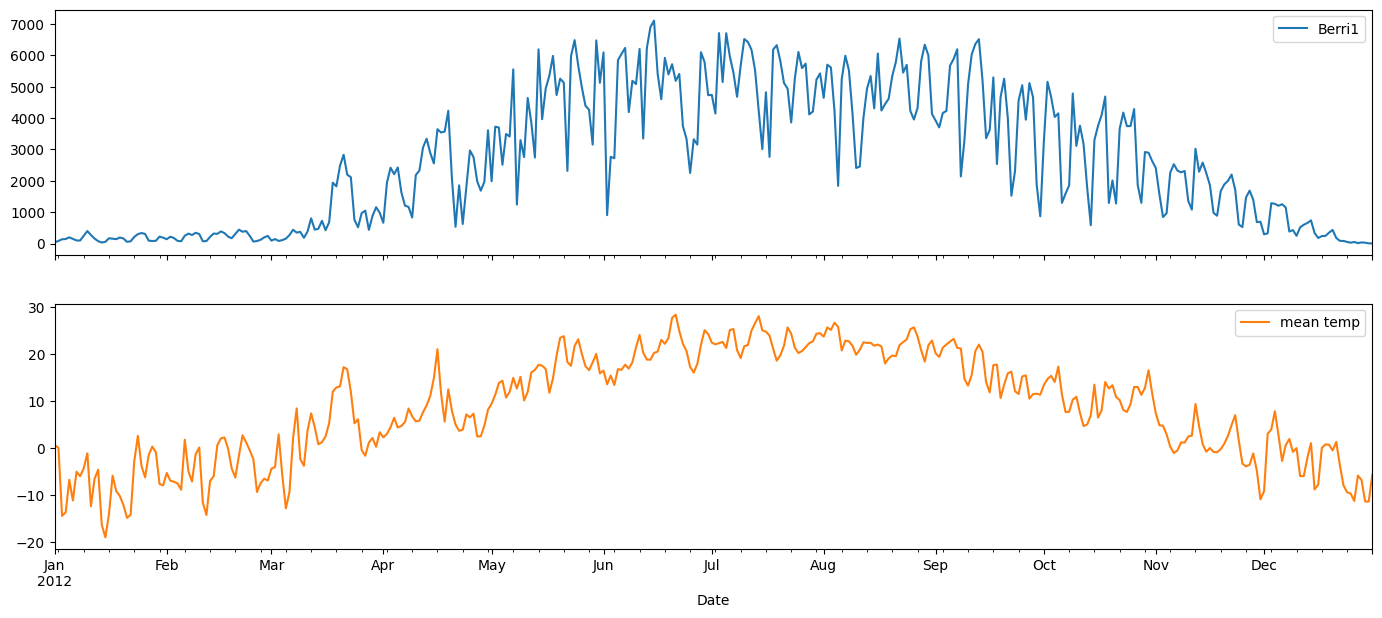

In [58]:
bike_data[['Berri1', 'mean temp']].plot(subplots=True)

## Do people bike when it's raining?

In [60]:
weather_data['Weather'].str.contains('Rain').value_counts()

Weather
False    8095
True      689
Name: count, dtype: int64

In [61]:
bike_data['Rain'] = weather_data['Weather'].str.contains('Rain').map(lambda x: int(x)).resample('D').mean()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

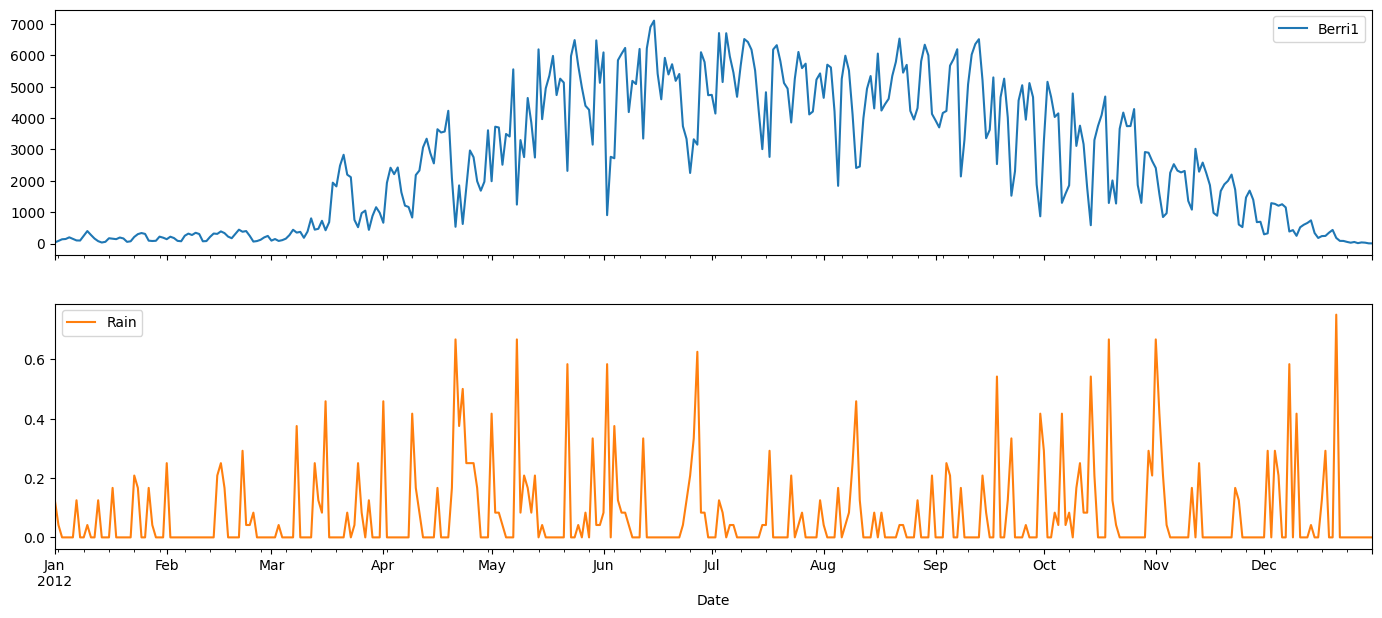

In [62]:
bike_data[['Berri1', 'Rain']].plot(subplots=True)

Resources
---------

* This presentation: [http://bit.ly/pandas-mtlpy](http://bit.ly/pandas-mtlpy)
* Python for Data Analysis by Wes McKinney
* [http://pandas.pydata.org/](http://pandas.pydata.org/) has a 460-page PDF with lots of examples

## Some extra slides that didn't make it in :)

## What are the counts by weekday?

In [63]:
bike_data['weekday'] = bike_data.index.weekday
bike_data.head()

,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Parc,PierDup,CSC (CÃ´te Sainte-Catherine),mean temp,Rain,weekday
Date,,,,,,,,,,
2012-01-01,16,35,51,38,26,10,0,0.629167,0.125000,6
2012-01-02,43,83,153,68,53,6,1,0.041667,0.041667,0
2012-01-03,58,135,248,104,89,3,2,-14.416667,0.000000,1
2012-01-04,61,144,318,116,111,8,1,-13.645833,0.000000,2
2012-01-05,95,197,330,124,97,13,2,-6.750000,0.000000,3


## But which day is 6?

In [64]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bike_data['weekday'] = bike_data['weekday'].map(lambda x: days[x])

In [65]:
bike_data.head()

,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Parc,PierDup,CSC (CÃ´te Sainte-Catherine),mean temp,Rain,weekday
Date,,,,,,,,,,
2012-01-01,16,35,51,38,26,10,0,0.629167,0.125000,Sunday
2012-01-02,43,83,153,68,53,6,1,0.041667,0.041667,Monday
2012-01-03,58,135,248,104,89,3,2,-14.416667,0.000000,Tuesday
2012-01-04,61,144,318,116,111,8,1,-13.645833,0.000000,Wednesday
2012-01-05,95,197,330,124,97,13,2,-6.750000,0.000000,Thursday


## Getting the total number of bikes on each weekday

In [67]:
counts_by_day = bike_data.groupby('weekday').aggregate(np.sum)

C:\Users\nurfu\AppData\Local\Temp\ipykernel_8916\1273455564.py:1: FutureWarning: The provided callable <function sum at 0x000001894E682B60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  counts_by_day = bike_data.groupby('weekday').aggregate(np.sum)


In [68]:
counts_by_day.index = days

<Axes: >

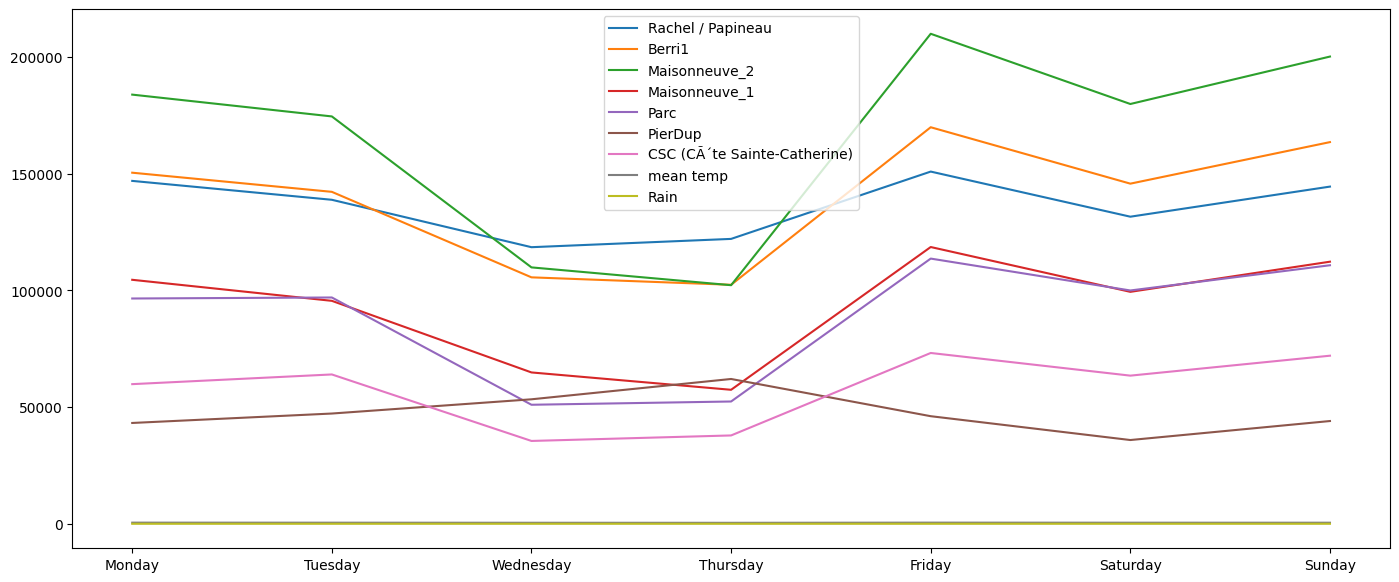

In [69]:
counts_by_day.plot()